# Analysis of RNA-Seq Data

Piero Palacios Bernuy [](https://orcid.org/0000-0001-6729-4080)  
March 5, 2024

This document is part of a series of the analysis of Omics data. Especifically, here is showed how to analyze bulk RNA-Seq data with Bioconductor packages. Also, it’s showcased how to make plots of the RNA data in the context of differentially gene expression and gene-sets.

## Introduction

The analysis of RNA-Seq data involves two distinct parts. The first one needs the use of servers or HPC (high performance computers) and has to do with quality control. pre-processing, alignment-mapping (usually with the STAR software) and counting (can be done using RSEM software). The second one is called downstream analysis and this part involves differential gene expression, gene sets analysis, etc.

Due to the lack of facility to use a server or hpc the first part of the RNA-Seq analysis won’t be done but, you can use the *rnaseq pipeline* from [nfcore](https://nf-co.re/rnaseq/3.14.0). In my experience, the best combination is to use fastq + STAR + RSEM combination of software for this part of the analysis.

With respect to the second part of the analysis, on this document we’ll see how to analyze the airway data set which is a treatment of dexametasome on specific cell lines. Specifically, differentially gene expression, gene sets enrichment analysis and network analysis will be performed.

## Data & Methods

We are gonna use the airway dataset from the `airway` package. Part of the analysis will be: - Differential gene expression using `DESeq2`. - Gene set analysis with fgsea from Cluster profiler. - Network analysis with networkx.

In [ ]:
library(airway)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'MatrixGenerics'

The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeightedMeans, rowWeightedMedians,
    rowWeightedSds, rowWeig

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min

Loading required package: S4Vectors


Attaching package: 'S4Vectors'

The following object is masked from 'package:utils':

    findMatches

The following objects are masked from 'package:base':

    expand.grid, I, unname

Loading required package: IRanges


Attaching package: 'IRanges'

The following object is masked from 'package:grDevices':

    windows

Loading required package: GenomeInfoDb

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Attaching package: 'Biobase'

The following object is masked from 'package:MatrixGenerics':

    rowMedians

The following objects are masked from 'package:matrixStats':

    anyMissing, rowMedians

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%() masks IRanges::%within%()
✖ dplyr::collapse()     masks IRanges::collapse()
✖ dplyr::combine()      masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()        masks matrixStats::count()
✖ dplyr::desc()         masks IRanges::desc()
✖ tidyr::expand()       masks S4Vectors::expand()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::first()        masks S4Vectors::first()
✖ dplyr::lag()          masks stats::lag()
✖ ggplot2::Position()   masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()       masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()       masks S4Vectors::rename()
✖ lubridate::second()   masks S4Vectors::second()
✖ lubridate::second<-() masks S4Vectors::second<-()
✖ dplyr::slice()        masks IRanges::slice()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Loading required package: plotly


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:IRanges':

    slice

The following object is masked from 'package:S4Vectors':

    rename

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

Loading required package: viridis

Loading required package: viridisLite

Welcome to heatmaply version 1.5.0

Type citation('heatmaply') for how to cite the package.
Type ?heatmaply for the main documentation.

The github page is: https://github.com/talgalili/heatmaply/
Please submit your suggestions and bug-reports at: https://github.com/talgalili/heatmaply/issues
You may ask questions at stackoverflow, use the r and heatmaply tags: 
     https://stackoverflow.com/questions/tagged/heatmaply


Attaching package: 'heatmaply'

The following object is masked from 'package:BiocGenerics':

    normalize


Attaching package: 'genefilter'

The following object is masked from 'package:readr':

    spec

The following objects are masked from 'package:MatrixGenerics':

    rowSds, rowVars

The following objects are masked from 'package:matrixStats':

    rowSds, rowVars


Attaching package: 'igraph'

The following object is masked from 'package:heatmaply':

    normalize

The following object is masked from 'package:plotly':

    groups

The following objects are masked from 'package:lubridate':

    %--%, union

The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union

The following objects are masked from 'package:purrr':

    compose, simplify

The following object is masked from 'package:tidyr':

    crossing

The following object is masked from 'package:tibble':

    as_data_frame

The following object is masked from 'package:GenomicRanges':

    union

The following object is masked from 'package:IRanges':

    union

The following object is masked from 'package:S4Vectors':

    union

The following objects are masked from 'package:BiocGenerics':

    normalize, path, union

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    unio

Loading required package: AnnotationDbi


Attaching package: 'AnnotationDbi'

The following object is masked from 'package:plotly':

    select

The following object is masked from 'package:dplyr':

    select


This is 'rols' version 2.30.2 


Attaching package: 'rols'

The following object is masked from 'package:AnnotationDbi':

    Term

clusterProfiler v4.10.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141

Attaching package: 'clusterProfiler'

The following object is masked from 'package:AnnotationDbi':

    select

The following object is masked from 'package:igraph':

    simplify

The following object is masked from 'package:purrr':

    simplify

The following object is masked from 'package:IRanges':

    slice

The following object is masked from 'package:S4Vectors':

    rename

The following object is masked from 'package:stats':

    filter


Attaching package: 'scales'

The following object is masked from 'package:viridis':

    viridis_pal

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor


Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract

The following object is masked from 'package:GenomicRanges':

    subtract

### Data Loading

For all the analysis the @airway dataset will be used. Also, the @DESeq2 package will be used for the differential gene expression step.

In [ ]:
data("airway")

dds <- DESeqDataSet(se = airway, design = ~ cell + dex)

### Pre-filtering

In [ ]:
keep <- rowSums(counts(dds)>= 10) >= 3

dds <- dds[keep,]

#### Re-leveling Factors

In [ ]:
dds$dex <- factor(dds$dex, levels = c("untrt","trt"))
dds$dex <- relevel(dds$dex, ref = "untrt")
dds$dex <- droplevels(dds$dex)

### Quality Control of Samples

We can see how the variance is stabilized with the rlog transformation.

In [ ]:
rld <- rlog(dds)

hex_df<-data.frame(Means=rowMeans(assay(rld)),
                   Sds=rowSds(assay(rld)))

gghex<-hex_df |> 
  ggplot(aes(Means,Sds))+
  geom_hex(alpha=0.8,bins=40)+
  guides(fill=guide_colourbar(title = "Counts"))+
  labs(x="Sorted mean of normalized counts per gene",
       y="Standard deviation of normalized counts per gene")+
  theme_minimal()+
  geom_smooth(aes(Means,Sds),colour="red",linewidth=0.5) +
  paletteer::scale_fill_paletteer_c("ggthemes::Green-Gold")

bslib::card(full_screen = T, bslib::card_title("Stabilized Variance"), plotly::ggplotly(gghex))

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'

Stabilized Variance

Also, is important to check if appears some structure in the sample to sample distances plot.

In [ ]:
dds<-estimateSizeFactors(dds)
select <- order(rowMeans(counts(dds,normalized=TRUE)),
                decreasing=TRUE)[1:20]

sampleDists <- dist(t(assay(rld)))

sampleDistMatrix <- as.matrix(sampleDists)

ggheat<-heatmaply(sampleDistMatrix,
            row_side_colors = colData(rld)[,c("dex","cell")],
            row_dend_left = F,colors = viridis::magma(n=256, alpha = 0.8, begin = 0))

bslib::card(full_screen = T, bslib::card_title("Sample-Sample Distance"), ggheat)

Sample-Sample Distance 
 

 
 
 Expand

### Differential Gene Expression (DGE)

Let’s calculate differential expressed genes using shrinked log2 fold changes with threshold of 1 and a FDR of 0.05.

In [ ]:
dds <- DESeq(dds)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

computing FSOS 'false sign or small' s-values (T=1)

We can see the MA plots as a general view of up and down regulated genes.

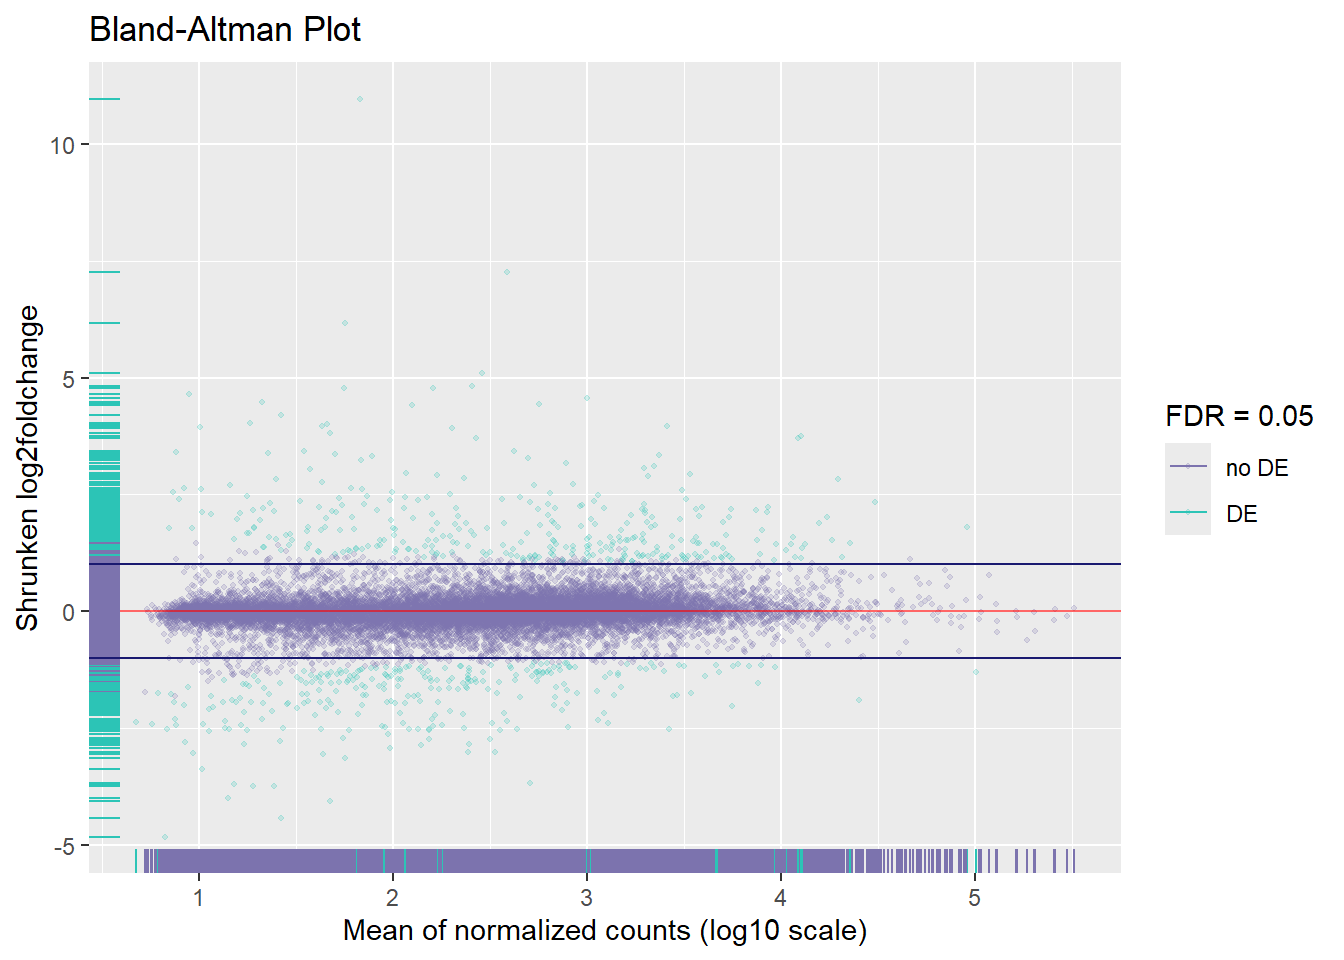

In [ ]:
a<-plotMA(res.lfc,alpha=0.05,returnData=T)

a$symbol<-rownames(a)
a$label<-NA
a$label[a$isDE == TRUE] <- a$symbol[a$isDE == TRUE]

p <- ggplot(a, aes(log10(mean), lfc, colour = isDE)) +
    geom_point(alpha = 0.2, size = 0.8) +
    geom_hline(aes(yintercept = 0), col = "red", alpha = 0.6) +
    geom_rug() +
    geom_hline(yintercept = c(-1, 1), color = "midnightblue") +
    scale_colour_manual(
      name = paste0("FDR = ", 0.05),
      values = c(mnsl("10PB 5/8"), mnsl("5BG 7/8")),
      labels = c("no DE", "DE")
    ) +
    labs(
      y = "Shrunken log2foldchange",
      x = "Mean of normalized counts (log10 scale)",
      title = "Bland-Altman Plot"
    )

p

#### Top 20 Expressed Genes

As a general view, we can select the top 20 expressed genes ordered by the number of counts.

In [ ]:
df<-heatmaply::heatmaply(assay(rld)[select,],
                         col_side_colors=colData(rld)[,c("dex","cell")],
                         colors = viridis::magma(n=256, alpha = 0.8, begin = 0))

bslib::card(df, full_screen = T)

Expand

### Manipulating Annotation with a SQLite DB

For this part of the analysis, is important to use annotation databases, in this case we are gonna use the human h19 genome annotation from the @org.Hs.eg.db package.

In [ ]:
k<-keys(org.Hs.eg.db)


a <- AnnotationDbi::select(
        org.Hs.eg.db,
        keys = k,
        keytype = "ENTREZID",
        columns = c("SYMBOL", "GENENAME")
      )

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns

### Construction of Ranks for `fgsea`

In [ ]:
res.lfc_for_ranks <-
      res.lfc%>%
      as.data.frame()%>%
      dplyr::select(SYMBOL,log2FoldChange)%>%
      na.omit()%>%
      distinct()%>%
      group_by(SYMBOL)%>%
      summarize(log2FoldChange=mean(log2FoldChange))
    
res.lfc_ranks <-
      deframe(res.lfc_for_ranks)

### Data Manipulation for `GeneTonic`

For this part of the process, the @clusterProfiler package will be used to make the gene sets enrichment analysis. Is important to mention that for this analysis we are gonna analyze only the biological process ontology,

In [ ]:
ranks_entrez<-bitr(names(res.lfc_ranks),fromType = "SYMBOL",toType = "ENTREZID",OrgDb = org.Hs.eg.db)

'select()' returned 1:many mapping between keys and columns

Warning in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, : There are ties in the preranked stats (0.01% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.

Using the content of the 'core_enrichment' column to generate the 'gs_genes' for GeneTonic... If you have that information available directly, please adjust the content accordingly.

Using the set of the 'core_enrichment' size to compute the 'gs_de_count'

Found 5414 gene sets in `gseaResult` object, of which 5414 are significant.

Converting for usage in GeneTonic...

---------------------------------
----- GeneTonicList object ------
---------------------------------

----- dds object -----
Providing an expression object (as DESeqDataset) of 16596 features over 8 samples

----- res_de object -----
Providing a DE result object (as DESeqResults), 16596 features tested, 228 found as DE
Upregulated:     142
Downregulated:   86

----- res_enrich object -----
Providing an enrichment result object, 5414 reported

----- annotation_obj object -----
Providing an annotation object of 16596 features with information on 3 identifier types

#### Summary Heatmap of Genesets

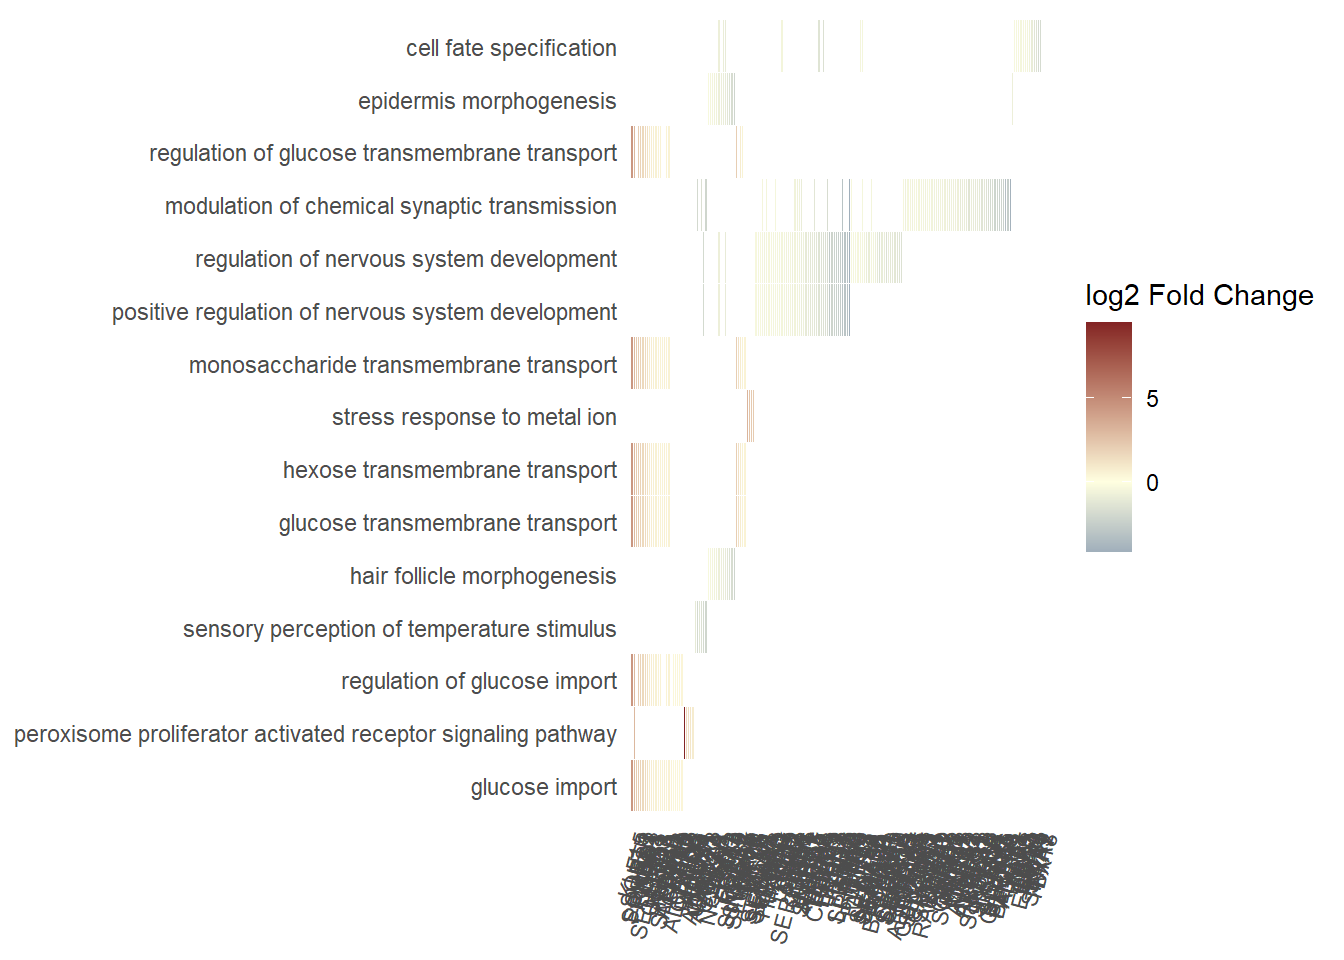

In [ ]:
p<-gs_summary_heat(gtl = gtl_res_GOclu_BP,
                    n_gs=15)

p

#### GeneSets - Genes Graph

`GeneTonic` package have a lot of interactive plots that we can use to dig into our data. An example is a network of Gene sets and genes from which we are gonna perform a network analysis.

In [ ]:
ggs <- ggs_graph(gtl = gtl_res_GOclu_BP, n_gs = 100)
ggs2 <- ggs_graph(gtl = gtl_res_GOclu_BP, n_gs = 20)

data <- toVisNetworkData(ggs)
data2 <- toVisNetworkData(ggs2)

data2$nodes <- data2$nodes %>%
  mutate(group = nodetype, nodetype = NULL) %>%
  dplyr::select(-color)

p <- visNetwork(nodes = data2$nodes, edges = data2$edges) %>%
  visIgraphLayout() %>%
  visOptions(
    highlightNearest = list(
      enabled = TRUE,
      degree = 1,
      hover = TRUE
    ),
    nodesIdSelection = TRUE
  ) %>%
  visPhysics(stabilization = FALSE) %>%
  visGroups(groupname = "GeneSet", color = "#48ABC7") %>%
  visGroups(groupname = "Feature", color = "#8BE64AD0")

htmltools::tagList(list(p))

### `igraph` Object Manipulation

In this part of the analysis, we are gonna make a network analysis with @networkx networkx library from python. But, before that we need to manipulate the data to have a proper input.

Let’s build a bipartite undirected adjacency matrix.

$$
A = \begin{pmatrix}
0_{r,r} & B\\
B^{T} & 0_{s,s}
\end{pmatrix}
$$

In [ ]:
V(ggs)$group <- data$nodes$nodetype

V(ggs)$type_bipartite <- as.integer(V(ggs)$nodetype == "Feature")


adj_matrix_bipartite <- as.matrix(as_adjacency_matrix(ggs, sparse = FALSE)) |> as.data.frame()

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx

C:\Users\LENOVO\MINICO~1\envs\piero\lib\site-packages\networkx\utils\backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))

Checking the degree distribution of the graph.

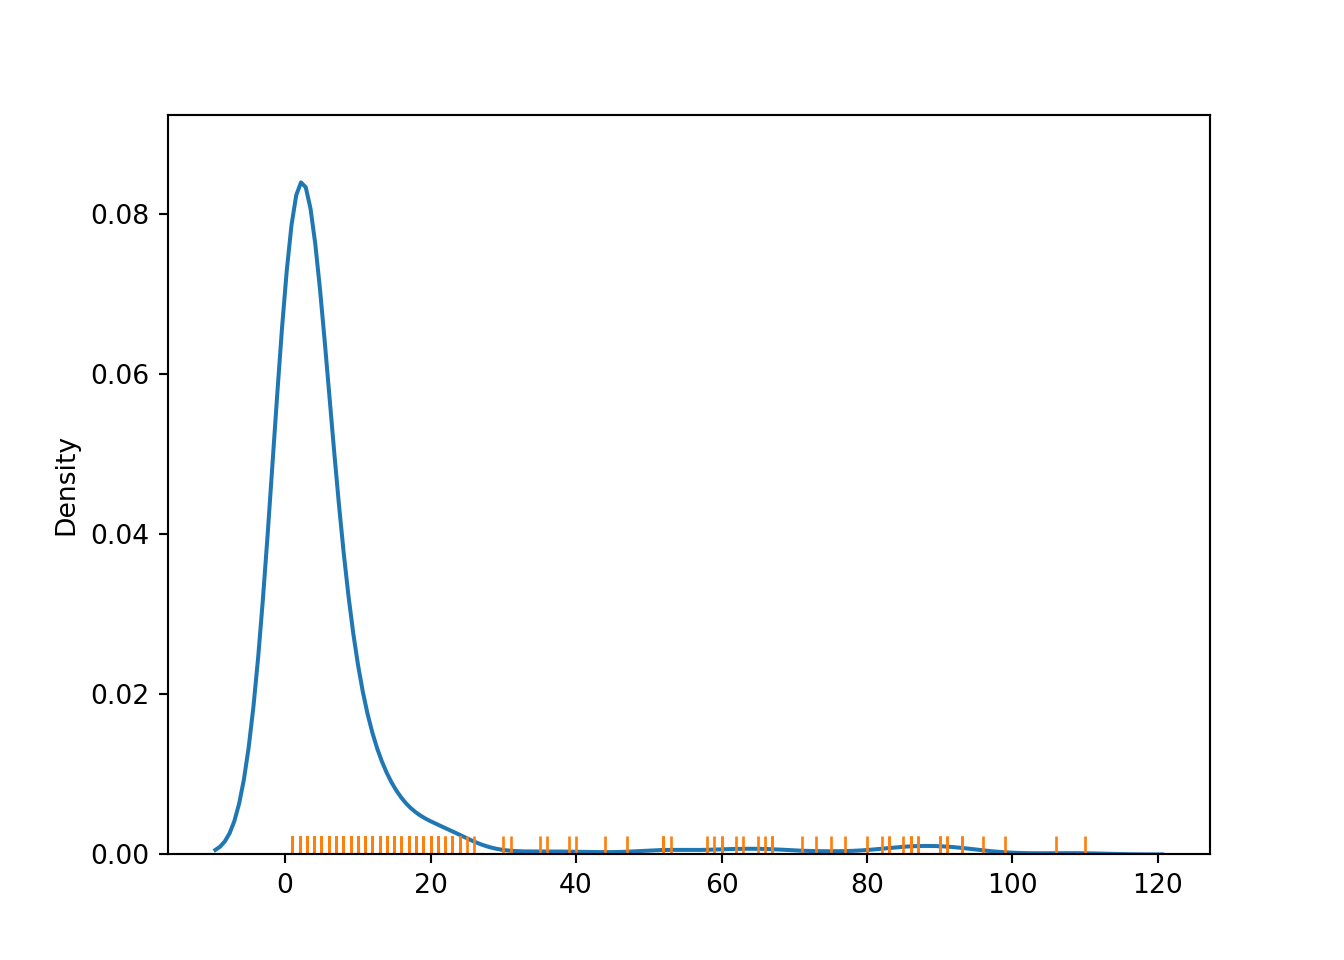

In [ ]:
graph = r.adj_matrix_bipartite

G = nx.from_pandas_adjacency(graph, create_using=nx.Graph)

degree_sequence = sorted((i[1] for i in G.degree), reverse=True)

sns.kdeplot(degree_sequence)
sns.rugplot(degree_sequence)
plt.show()

In this plot, we can see that there are two sub graphs with more than 100 connected components. We are gonna work with these.

#### Computing HITS (Hubs and Authorities) Scores.

In the context of bioinformatics, applying the concept of hubs and authorities to analyze gene sets and individual genes can offer insightful perspectives on the functional importance and interaction dynamics within genetic networks.

Gene sets or genes with high hub scores may represent critical regulatory functions or be involved in central biological processes. They could be key to understanding disease mechanisms, identifying potential therapeutic targets, or uncovering fundamental aspects of cellular function.

Gene sets or genes identified as high authorities could be central to multiple biological pathways, making them potential biomarkers for diseases or targets for therapeutic intervention. Their importance in various processes makes them subjects of interest for further research and analysis.

In [ ]:
h, a = nx.algorithms.link_analysis.hits(G, max_iter=1000000)

df_hubs = pd.DataFrame.from_dict(h, orient="index").sort_values(by=[0], ascending=False)
df_authorities = pd.DataFrame.from_dict(a, orient="index").sort_values(by=[0], ascending=False)

In [ ]:
df_a <- py$df_hubs |> 
  rename("Hubs Centrality"="0")

df_b <- py$df_authorities |> 
  rename("Authorities Centrality" = "0")

htmltools::tagList(list(DT::datatable(df_a,extensions = 'Buttons', options = list(
    dom = 'Bfrtip',
    buttons = c('copy', 'csv', 'excel')
  ))))

We can inspect the log fold change and p-values of some genes and gene sets with high scores.

In [ ]:
# a gene

query <- res.lfc[which(res.lfc$SYMBOL=="EPHB2"),] |> rownames()

res[which(rownames(res)==query),]

log2 fold change (MLE): dex trt vs untrt 
Wald test p-value: dex trt vs untrt 
DataFrame with 1 row and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000133216   344.728       -1.77321  0.159709  -4.84133 1.28972e-06
                       padj
                  <numeric>
ENSG00000133216 0.000143652

GO:0048858 
      "go" 

          GO:0048858 
"biological_process" 

                     GO:0048858 
"cell projection morphogenesis" 

                                                                                        GO:0048858 
"The process in which the anatomical structures of a cell projection are generated and organized." 

Also, we can see the network colored by these scores.

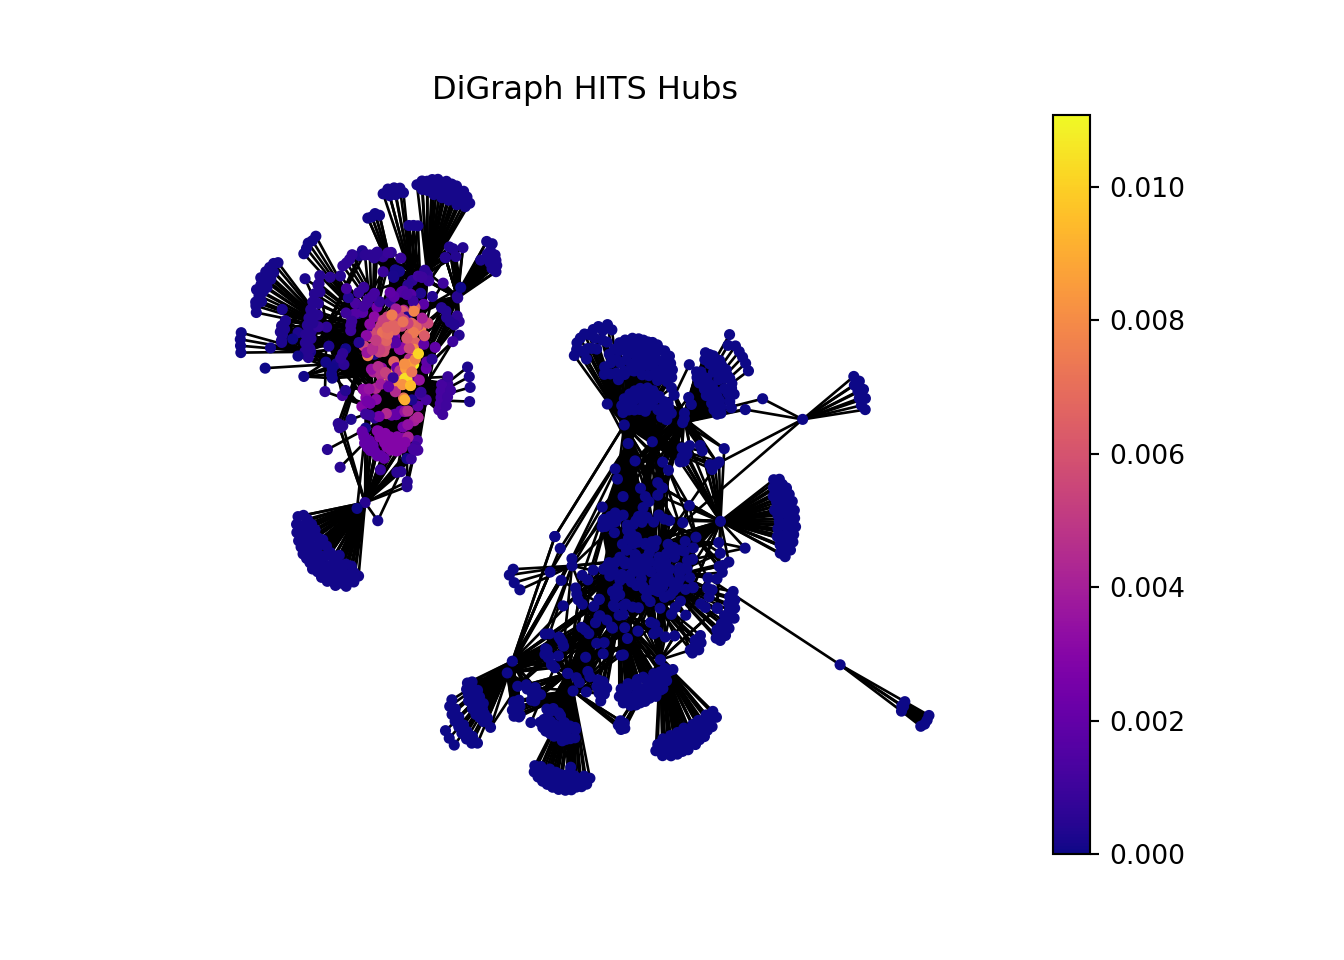

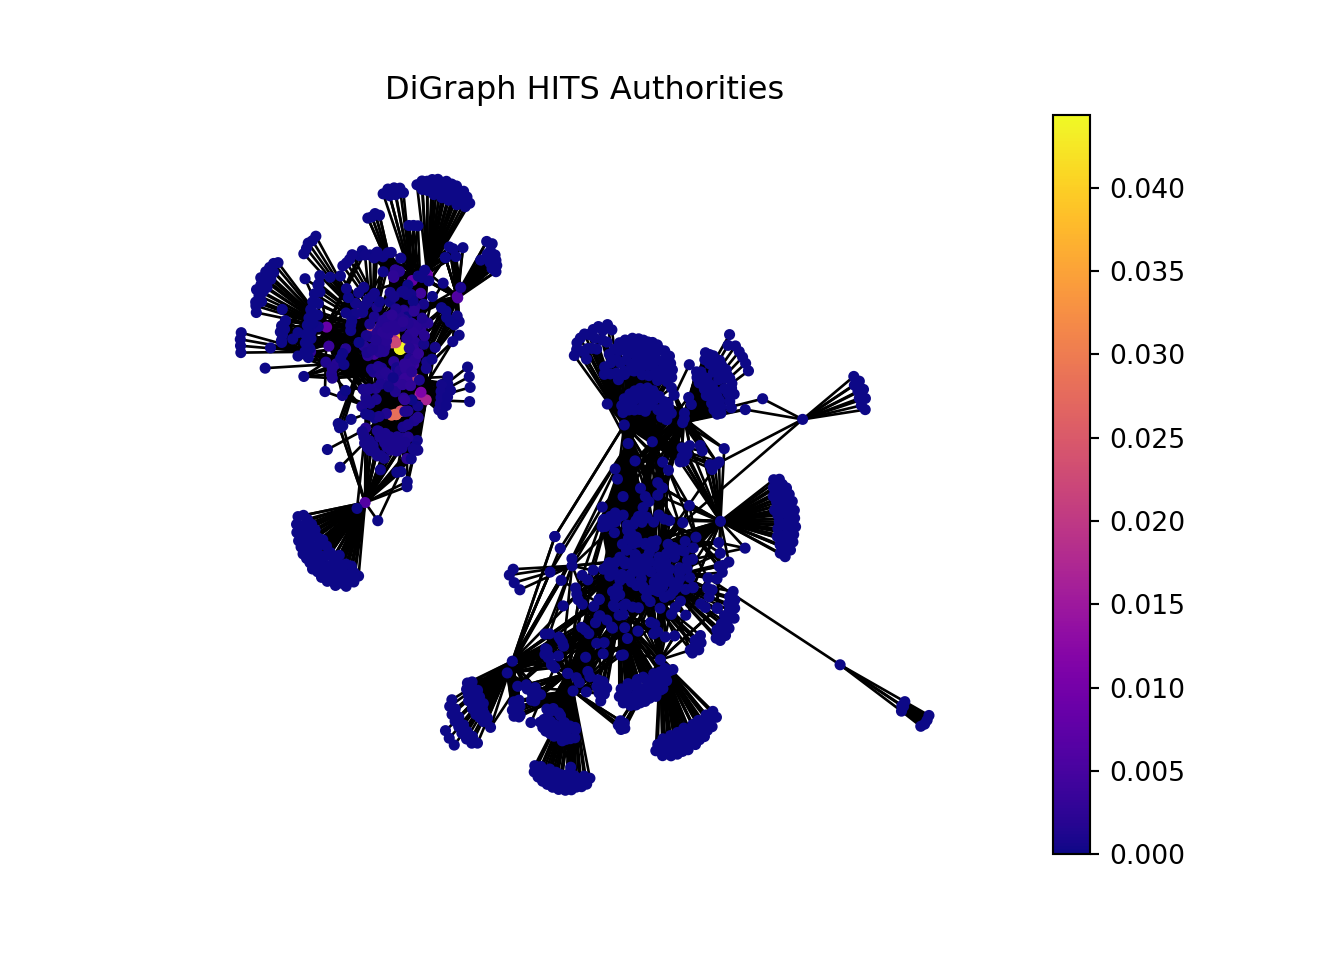

In [ ]:
import matplotlib.colors as mcolors

def draw(G, pos, measures, measure_name, norm=False):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=10, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    if norm == True:
      nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos, font_size=0.4)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()
    
pos = nx.spring_layout(G)

draw(G, pos, h, 'DiGraph HITS Hubs')

Detecting communities within the network can helps us understand better the underlying biological process.

(0.0, 1.0, 0.0, 1.0)

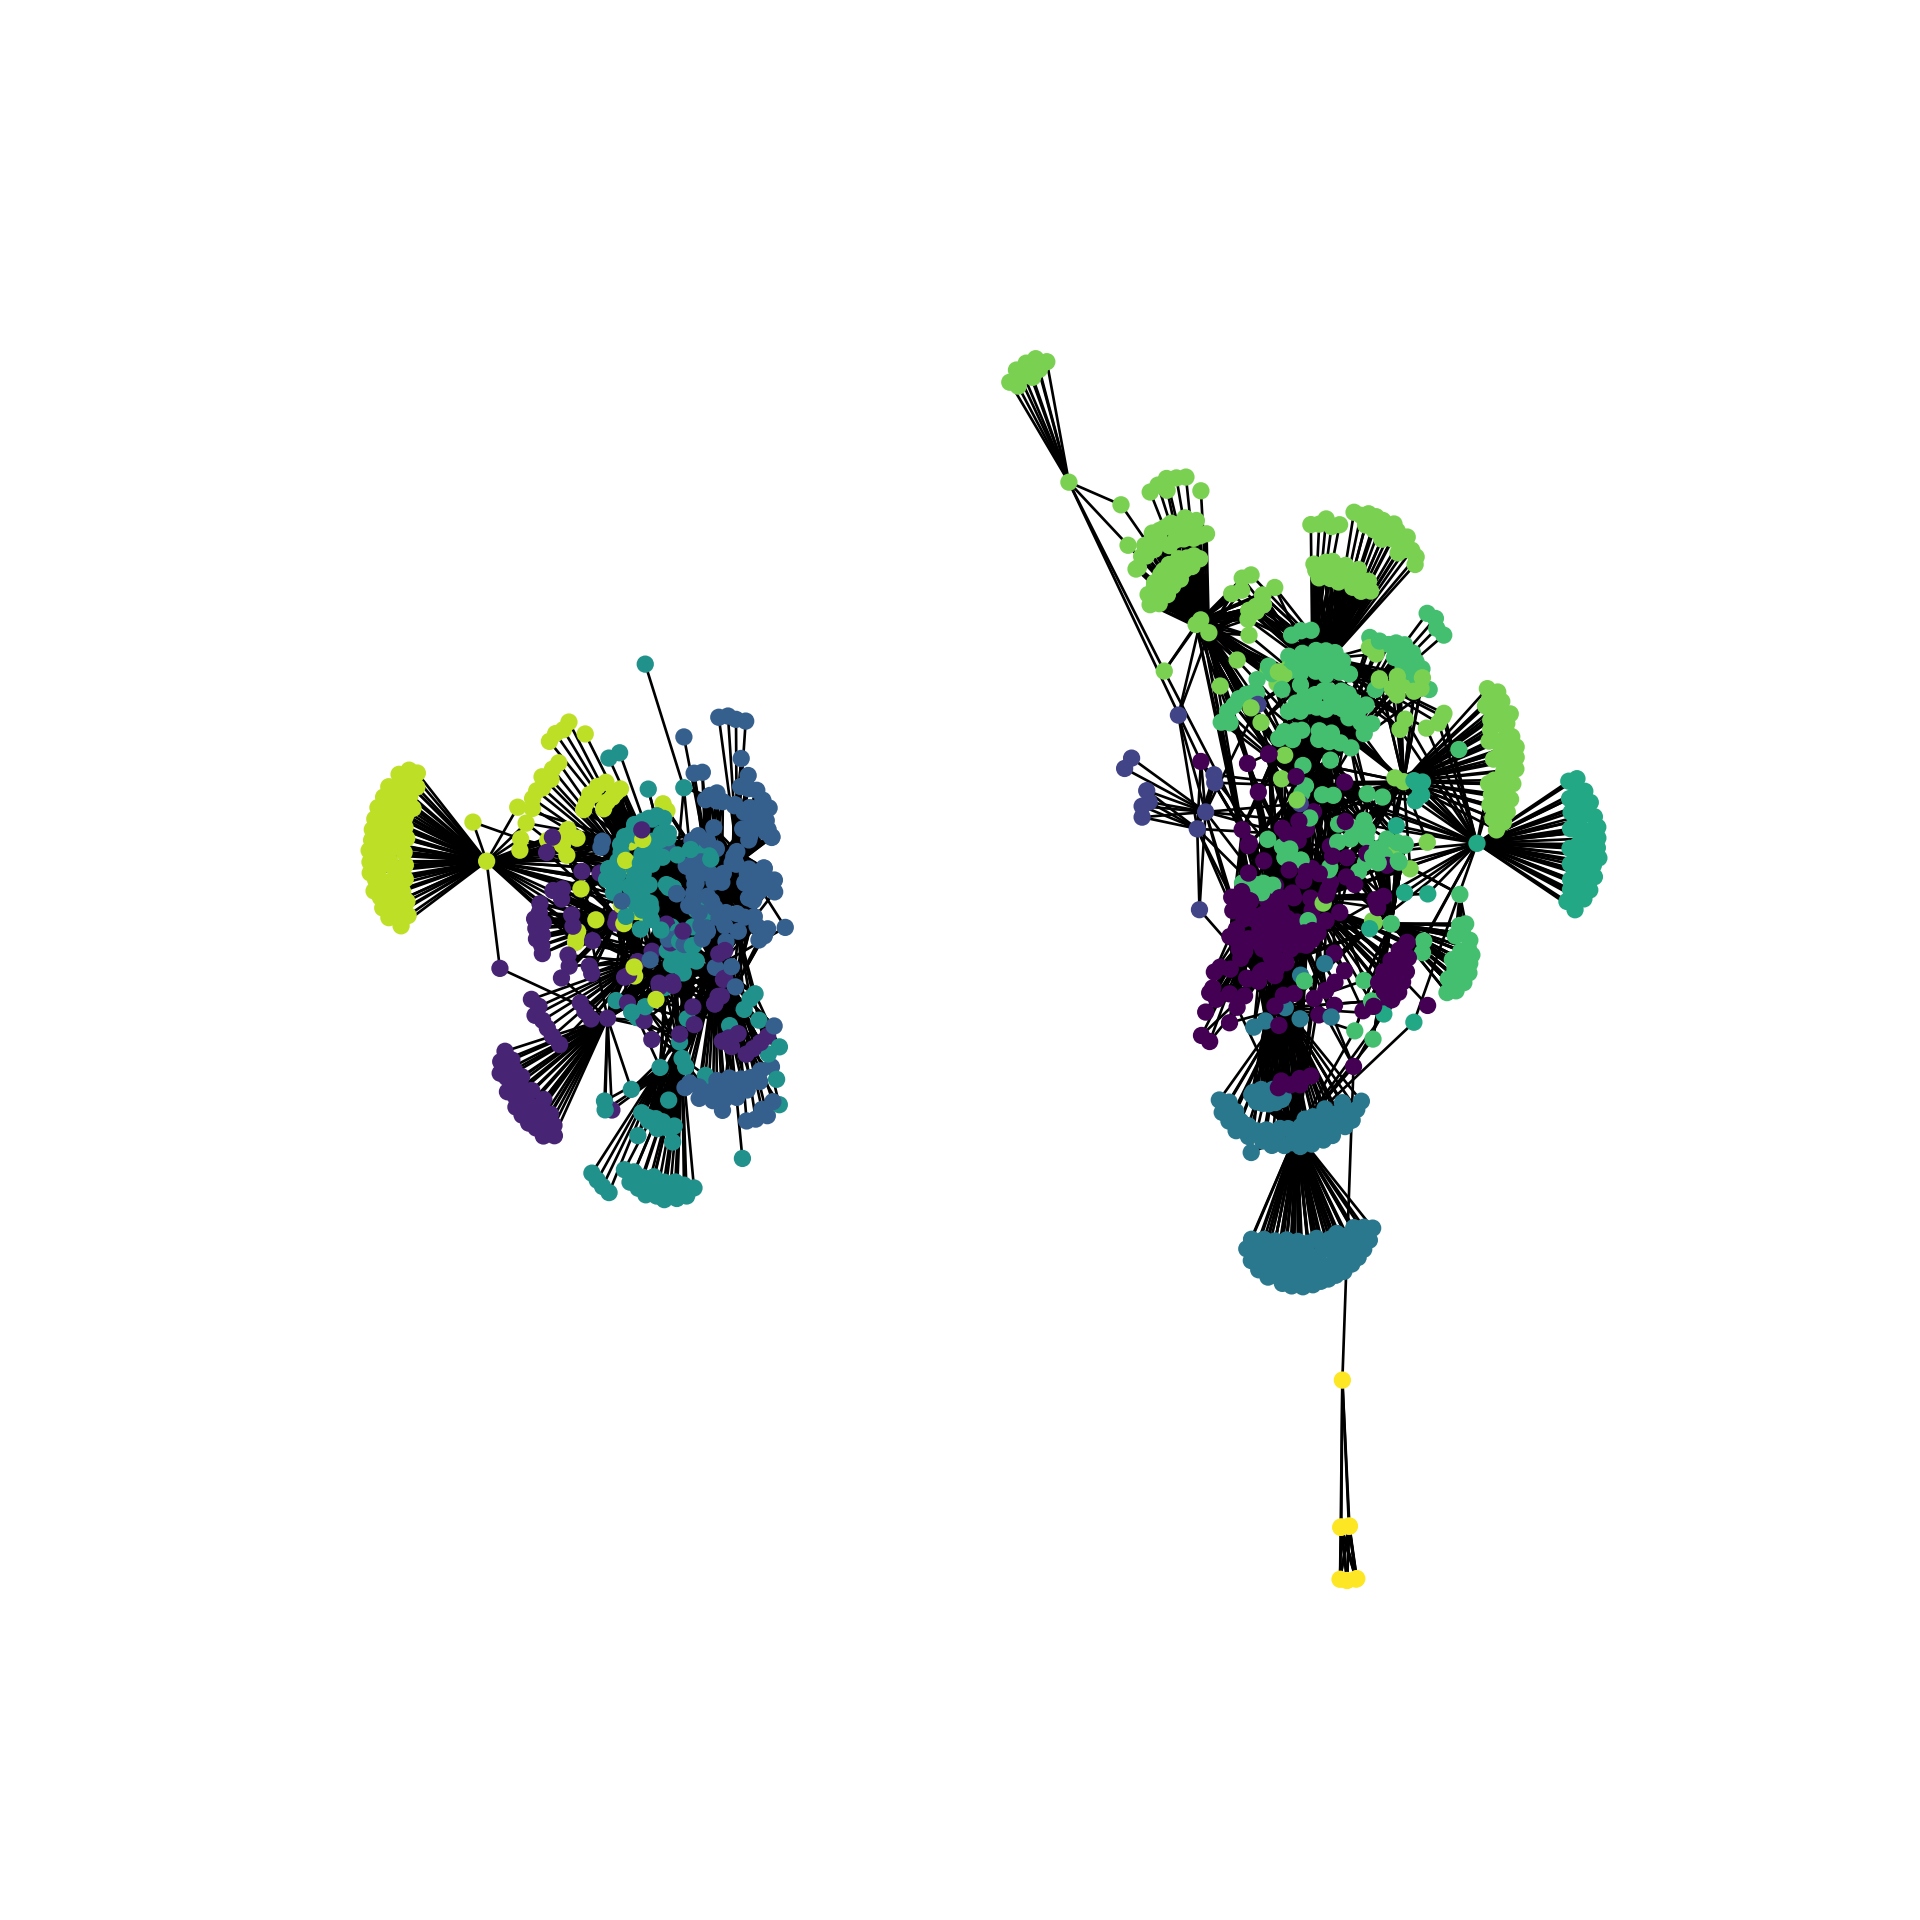

In [ ]:
from community import community_louvain


partitions = community_louvain.best_partition(G)
communities = [partitions.get(node) for node in G.nodes()]
nx.set_node_attributes(G, partitions, name='community')


colors = [G._node[n]['community'] for n in G._node]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.axis('off')

We can see the clusters and their respective members:

In [ ]:
df = py$df 
df = df |> 
  rename("Cluster" = "0") |> 
  mutate(Nodes = rownames(df)) |> 
  as_tibble()


df |> 
    group_by(Cluster) |> 
    summarise(n = n())

# A tibble: 11 × 2
   Cluster     n
     <dbl> <int>
 1       0   162
 2       1    99
 3       2    14
 4       3   148
 5       4   113
 6       5   141
 7       6    49
 8       7   165
 9       8   205
10       9   109
11      10     9

Also, we can focus on the most connected component of the network

The largest component have: 717

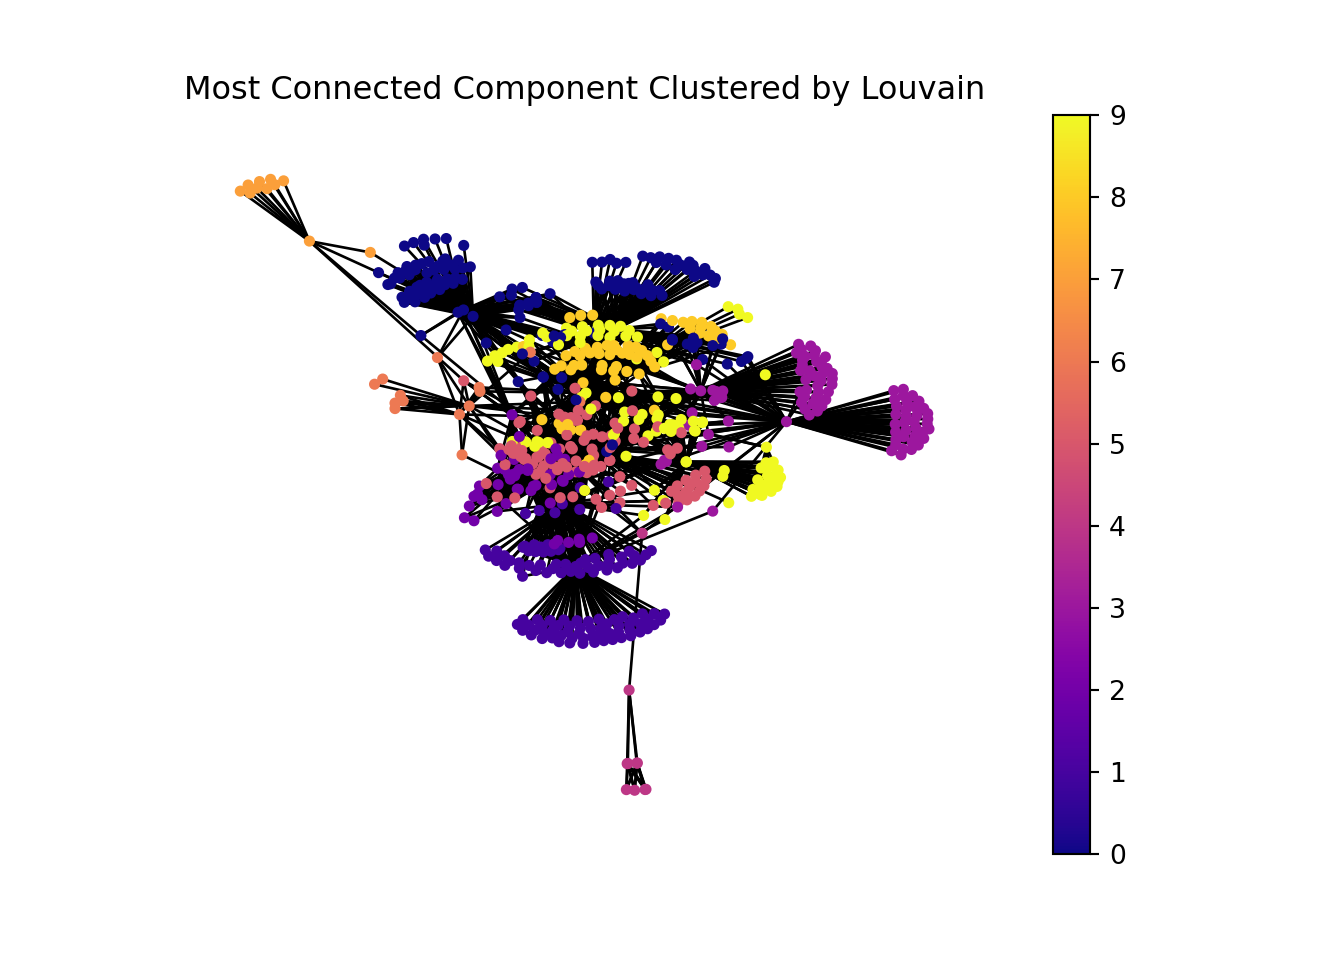

In [ ]:
components = nx.connected_components(G)
largest_component = max(components, key=len)

print(f'The largest component have: {len(largest_component)}')

If instead of analysis a bipartite network we want to analyze only gene sets or only genes we need to create two matrices: genesets_coupling matrix and gene_co_expression matrix.

In [ ]:
V(ggs)$group <- data$nodes$nodetype

# ontologies <- V(ggs)[group == "GeneSet"]
# genes <- V(ggs)[group == "Feature"]

adj_matrix_full <- as.matrix(as_adjacency_matrix(ggs, sparse = FALSE))

ontology_indices <- match(V(ggs)[group == "GeneSet"], V(ggs))
gene_indices <- match(V(ggs)[group == "Feature"], V(ggs))

adj_matrix_ontology_genes <- adj_matrix_full[ontology_indices, gene_indices] 


ontology_coupling <- adj_matrix_ontology_genes %*% t(adj_matrix_ontology_genes)

ontology_coupling <- ontology_coupling |> as.data.frame()

### Gene Sets Similarity

Gene sets similarity can be thought of as the similarity between gene sets based on their shared genes. The strength of the similarity can be measured by the number of genes shared between gene sets.

From a matrix $G_{mxn}$, with m gene sets and n genes, when can compute the gene set similarity matrix $S_{mxm}$ (where each element $s_{ij}$ represents the number of of shared genes between gene sets *i* and *j*) as followed:

$$
S = G*G^T
$$

In [ ]:
graph = r.ontology_coupling

G = nx.from_pandas_adjacency(graph, create_using=nx.Graph)
G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, name='degree_centrality')

betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
nx.set_node_attributes(G, betweenness_centrality, name='betweenness_centrality')

eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000000)
nx.set_node_attributes(G, eigenvector_centrality, name='eigenvector_centrality')


def graph_to_dataframe(graph):
   node_data = {node: graph.nodes[node] for node in graph.nodes()}
   df = pd.DataFrame.from_dict(node_data, orient='index')
   return df
 

df_genesets_centralities = graph_to_dataframe(G)

pos = nx.spring_layout(G)

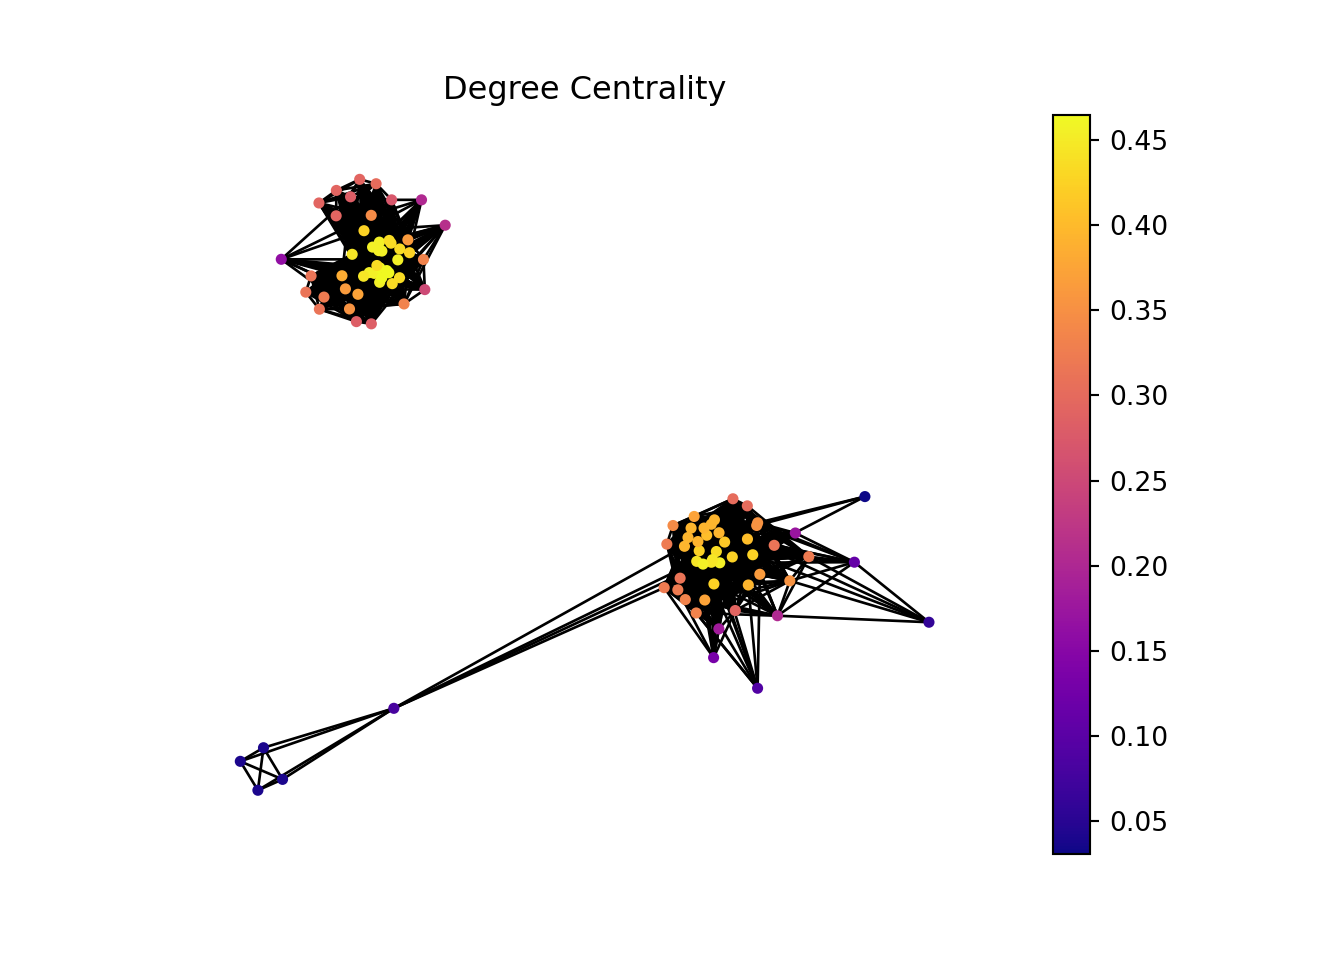

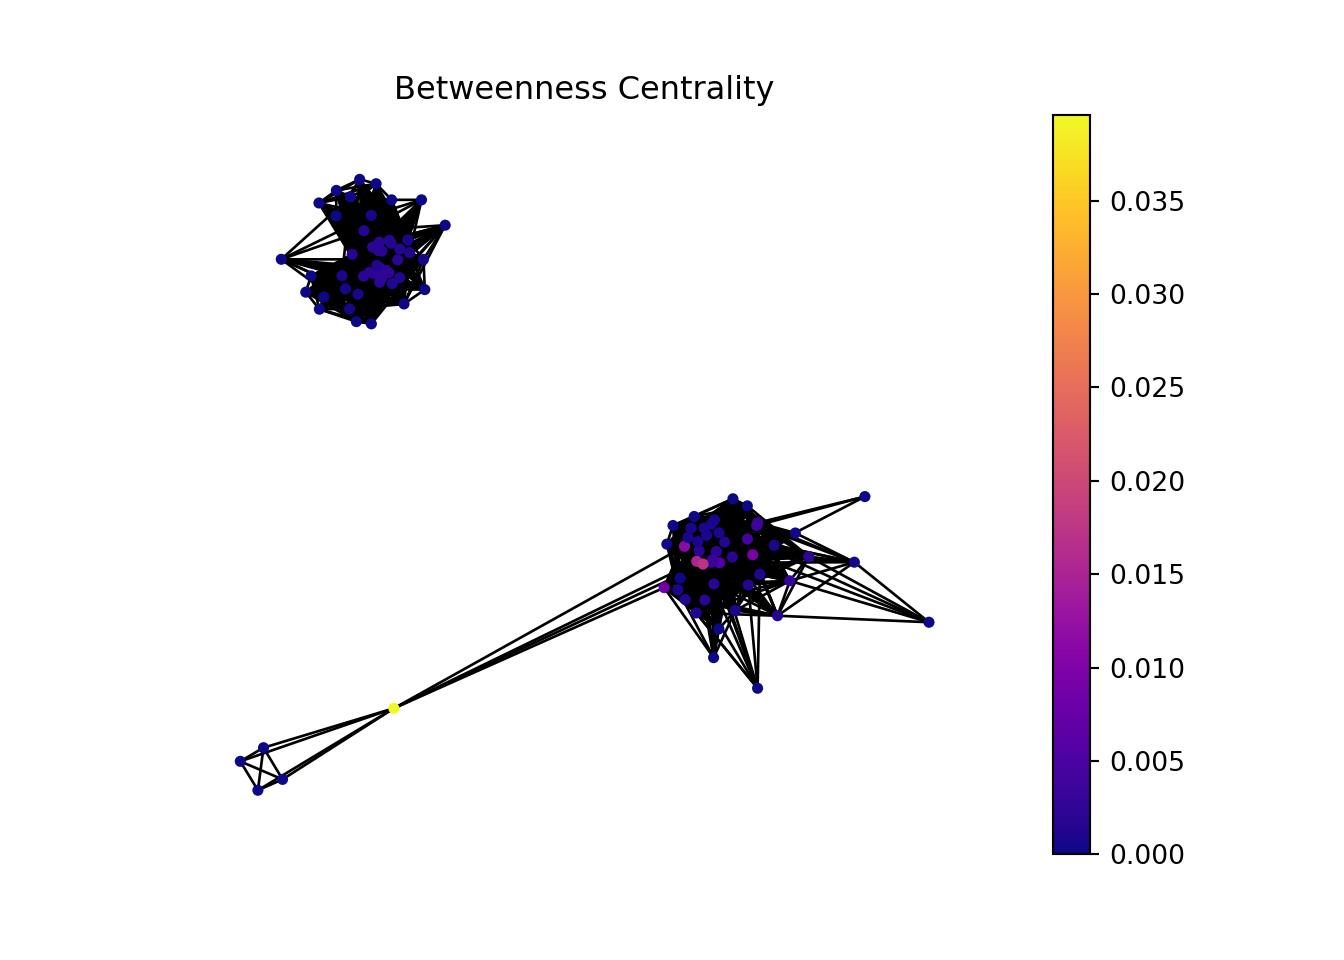

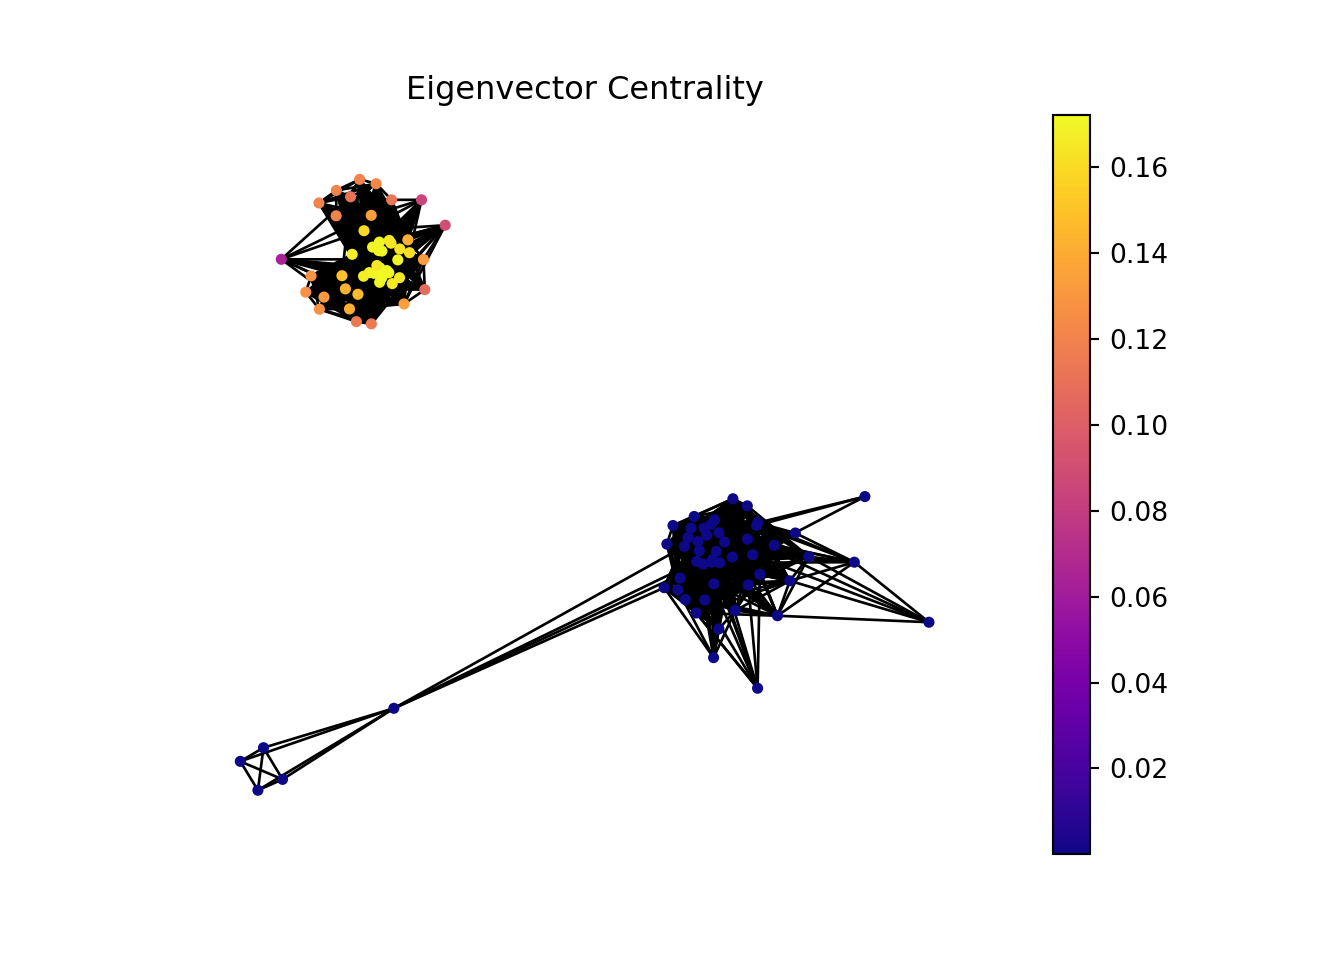

In [ ]:
draw(G, pos, nx.get_node_attributes(G,name="degree_centrality"),"Degree Centrality")

In [ ]:
df_c <- py$df_genesets_centralities

df_c <- df_c |> 
  arrange(desc(betweenness_centrality))

htmltools::tagList(list(DT::datatable(df_c, extensions = 'Buttons', options = list(
    dom = 'Bfrtip',
    buttons = c('copy', 'csv', 'excel')
  ))))

In [ ]:
query <- OlsSearch("detoxification of inorganic compound", exact = T, ontology = "GO")
query <- olsSearch(query)

qterms <- as(query,"Terms")

termOntology(qterms)

GO:0061687 
      "go" 

          GO:0061687 
"biological_process" 

                            GO:0061687 
"detoxification of inorganic compound" 

                                                                                                                                                                                                                            GO:0061687 
"Any process that reduces or removes the toxicity of inorganic compounds. These include transport of such compounds away from sensitive areas and to compartments or complexes whose purpose is sequestration of inorganic compounds." 

### Gene Co-involvement

Gene co-involvement can be interpreted as the co-involvement of genes in multiple gene sets. The strength of co-involvement can be measured by the number of gene sets in which two genes are both involved.

From a matrix $G_{mxn}$, with m gene sets and n genes, when can compute the gene set similarity matrix $C_{mxm}$ (where each element $c_{ij}$ represents the number of of shared genes between gene sets *i* and *j*) as followed:

$$
C = G^T*G
$$

In [ ]:
genes_coapprearence <- t(adj_matrix_ontology_genes) %*% adj_matrix_ontology_genes

genes_coapprearence <- genes_coapprearence |> as.data.frame()

In [ ]:
graph = r.genes_coapprearence

G = nx.from_pandas_adjacency(graph, create_using=nx.Graph)
G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, name='degree_centrality')

betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
nx.set_node_attributes(G, betweenness_centrality, name='betweenness_centrality')

eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000000)
nx.set_node_attributes(G, eigenvector_centrality, name='eigenvector_centrality')


def graph_to_dataframe(graph):
   node_data = {node: graph.nodes[node] for node in graph.nodes()}
   df = pd.DataFrame.from_dict(node_data, orient='index')
   return df
 

df_genes_centralities = graph_to_dataframe(G)

pos = nx.spring_layout(G)

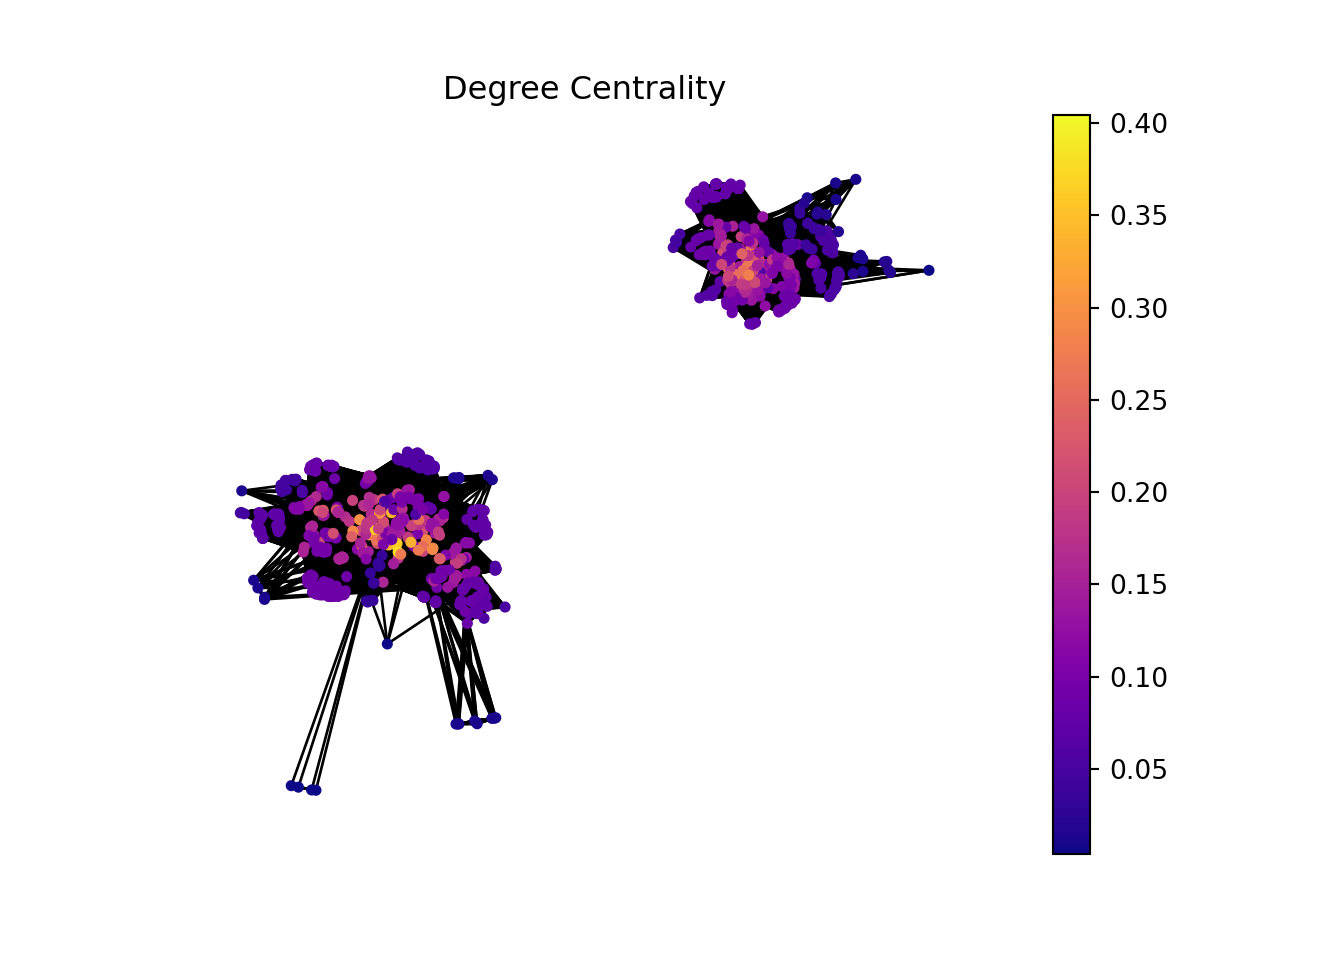

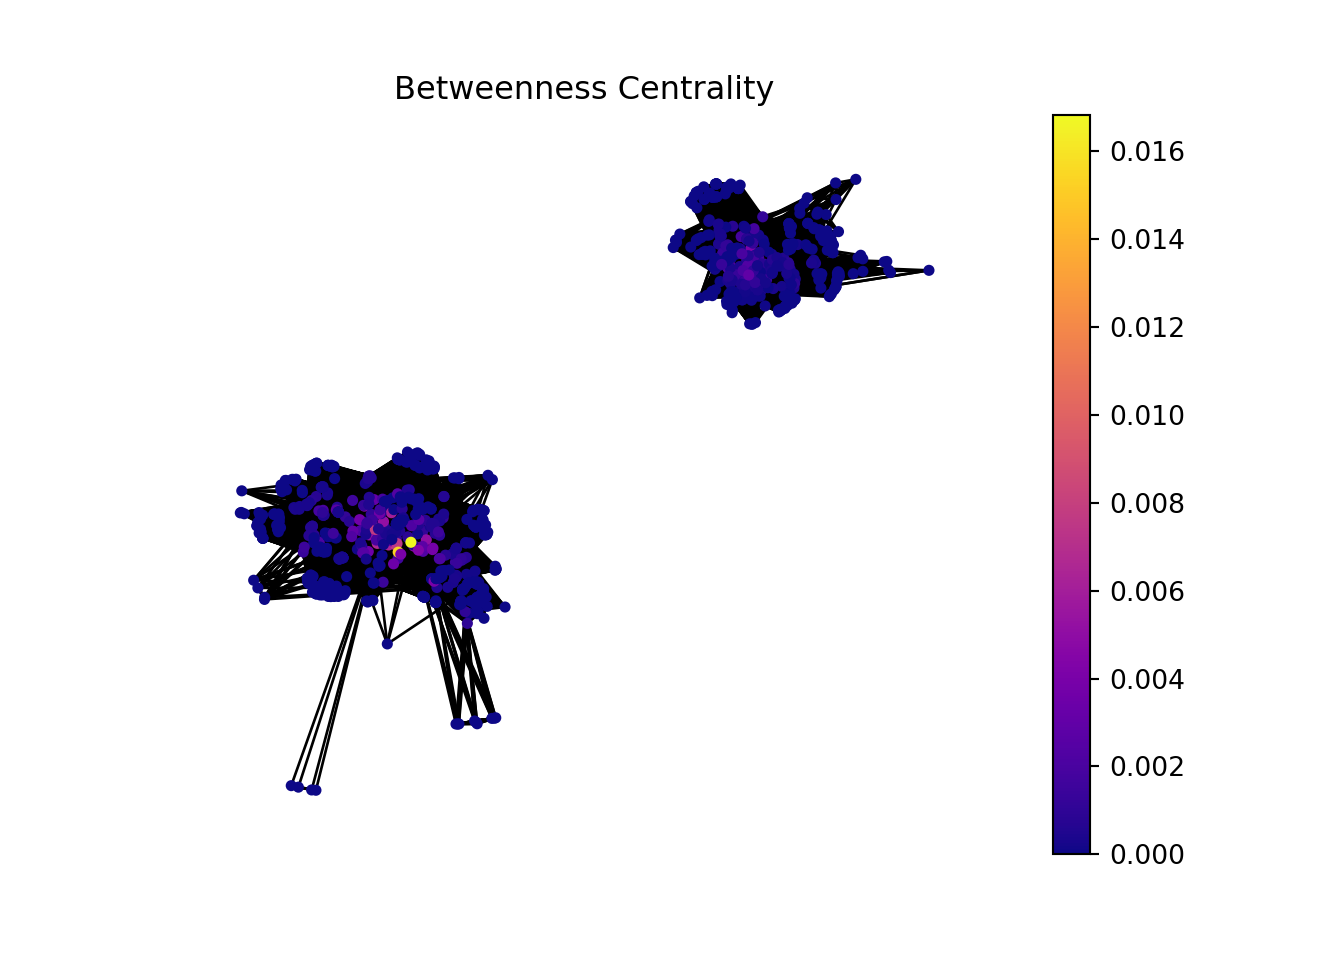

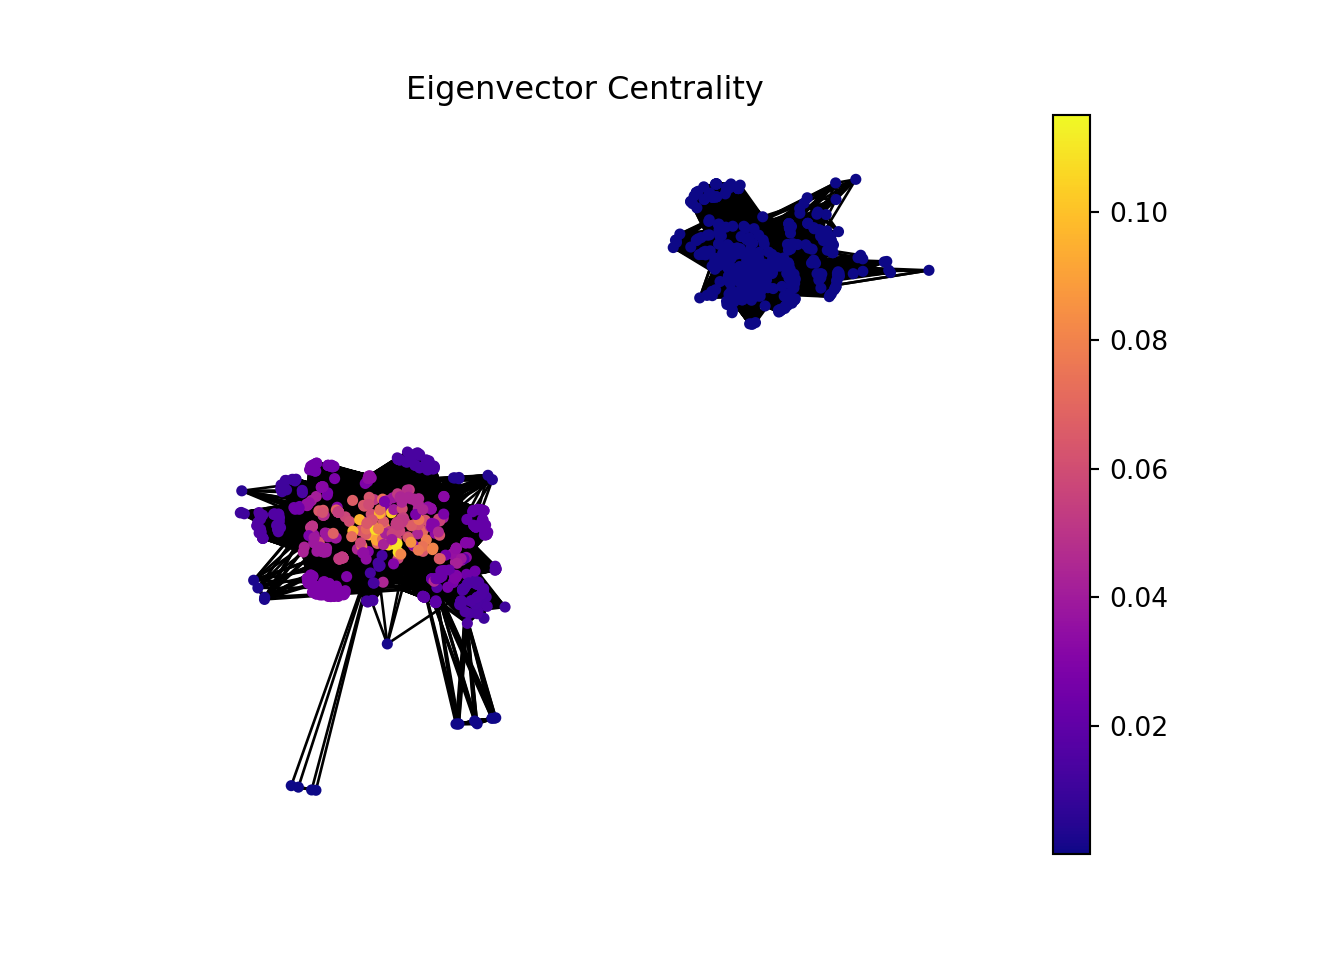

In [ ]:
draw(G, pos, nx.get_node_attributes(G,name="degree_centrality"),"Degree Centrality")

In [ ]:
df_d <- py$df_genes_centralities

df_d <- df_d |> 
  arrange(desc(betweenness_centrality))

htmltools::tagList(list(DT::datatable(df_d, extensions = 'Buttons', options = list(
    dom = 'Bfrtip',
    buttons = c('copy', 'csv', 'excel')
  ))))

In [ ]:
query <- res.lfc[which(res.lfc$SYMBOL=="LEP"),] |> rownames()

res[which(rownames(res)==query),]

log2 fold change (MLE): dex trt vs untrt 
Wald test p-value: dex trt vs untrt 
DataFrame with 1 row and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000174697   116.076        3.02938  0.326588   6.21389 5.16892e-10
                       padj
                  <numeric>
ENSG00000174697 8.66499e-08

## Conclusion

-   Differential gene expression analysis was performed on airway dataset.
-   Gene sets enrichment analysis was performed on airway dataset.
-   Network analysis was performed on airway dataset.

## References